# Data Classification

In [1]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# ToolKit

In [2]:
def loadexcel(x):#, #y = 'Sheet1'):
    run = True
    file= pd.ExcelFile(x)
    names = file.sheet_names
    names = re.sub("'",'', str(names))
    print ("This file contains this tab names:", names )
    while run is True:
        try:
            decision = (input("Choose your tab name? "))
            print ("Your choice is", decision)
            confirm = int(input("This is correct? Please write 1 for yes or 2 for no "))
            if confirm == 1:
                print ("Processing Tab, please wait")
                final_file = file.parse(decision)
                return final_file
                run = False
            else:
                print ('Choose the right tab!') 
        except Exception as e:
            print ("There is an error: ", e)
            print ("Please Try Again! :)")
            continue
            
def loading_excel():
    x = input('\033[94m'+'Please write your file location: ' +'\033[0m')
    real_x = path.realpath(x)
    doc = loadexcel(real_x) 
    return doc

In [3]:
def mergefield(x, jo=""):
    bold = "\033[1m"
    end =  "\033[0m"
    GREEN = '\033[92m'
    i=-1
    names = list(x)
    b = dict(enumerate(names))
    print ("This file contains this columns:" )
    for name in names:
        i=i+1
        print(str(i)+"."+" "+ name)
    print (bold+GREEN+"Choose the columns you want to merge."+end)
    election = input().split(",")
    item = list(map(int, election))
    convert = [b[y] for y in item]
    print("Your Choice is", convert)
    stripped = x[convert].fillna('').apply(lambda x: x.str.strip())
    join_symb = jo
    stripped = stripped.astype(str).apply(join_symb.join, axis=1)
    return stripped

In [4]:
def filtersame(x,y):  
    words_equal = []
    for word in x:
        if word in y:
            words_equal += [word]
    return words_equal

def removequal(x,y):  
    words_dif = []
    for word in y:
        if word not in x:
            words_dif += [word]
    return words_dif

In [5]:
from nltk.corpus import stopwords #create a variable to delete common words

def stopwords_list( lan ='spanish'):
    lan = str(lan)
    stopwords_es = stopwords.words(lan)
    stop_es = pd.DataFrame(stopwords_es)
    stop_es.columns =['StopWords']
    es_pal = '\\b'+stop_es['StopWords'].str.lower().astype(str)+'\\b'
    es_pal = es_pal.tolist()
    return es_pal

## Loading Clean Historical DB

### Necessary Libraries

In [6]:
from os import path
import pandas as pd
import re #regex
from nltk.stem.lancaster import LancasterStemmer

### Loading Files

In [7]:
#C:\Users\Gpardo\Desktop\Clasification\DB_Classifier_18_07_11.xlsx
db_train = loading_excel()
db_train.head()

Please write your file location: C:\Users\Gpardo\Desktop\Clasification\DB_Classifier_18_07_11.xlsx
This file contains this tab names: [Final Database]
Choose your tab name? Final Database
Your choice is Final Database
This is correct? Please write 1 for yes or 2 for no 1
Processing Tab, please wait


,Period,Descripcion,Vendors,Modelo,Model ID,Type
0,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO 4 BUNDLE,MIC-TH2-00001,Tablets
1,2017Q2,TABLET,LEVONO,TB3-850F,ZA170071CL,Tablets
2,2017Q2,TABLET,LENOVO,TB3-850F,ZA170078CL,Tablets
3,2017Q2,TABLET,AMAZON,FIRE HD7,AMZ-B00IKPYKWG,Tablets
4,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO TH4-00001,MIC-TH4-00001,Tablets


In [8]:
db_train['Type'].unique()

array(['Tablets', 'PCS', 'Trash'], dtype=object)

In [9]:
db_train.loc[db_train['Type']=="Trash",'Encode']= 0
db_train.loc[db_train['Type']=="Tablets",'Encode']= 1
db_train.loc[db_train['Type']=="PCS",'Encode']= 2
db_train.head()

,Period,Descripcion,Vendors,Modelo,Model ID,Type,Encode
0,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO 4 BUNDLE,MIC-TH2-00001,Tablets,1.0
1,2017Q2,TABLET,LEVONO,TB3-850F,ZA170071CL,Tablets,1.0
2,2017Q2,TABLET,LENOVO,TB3-850F,ZA170078CL,Tablets,1.0
3,2017Q2,TABLET,AMAZON,FIRE HD7,AMZ-B00IKPYKWG,Tablets,1.0
4,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO TH4-00001,MIC-TH4-00001,Tablets,1.0


In [10]:
db_hist_tablet = db_train[db_train['Encode']== 1] #Modelo
db_hist_trash = db_train[db_train['Encode']== 0]
db_hist_pc = db_train[db_train['Encode']== 2]

# Stem Only Description

In [11]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')
stemmer.stem('cuando')

'cuand'

In [12]:
db_hist_trash['Descripcion_Clean'] = db_hist_trash['Descripcion'].apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x))
db_hist_pc['Descripcion_Clean'] = db_hist_pc['Descripcion'].apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x))
db_hist_tablet['Descripcion_Clean.1'] = db_hist_tablet['Descripcion'].apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x))

In [13]:
db_hist_trash.head()
#db_hist_pc.head()
#db_hist_tablet

,Period,Descripcion,Vendors,Modelo,Model ID,Type,Encode,Descripcion_Clean
5,2017Q2,CAPTURADOR DE DATOS,"POINT MOBILE CO.,LTD",MODELO PM60G152356E0C,PM60G152356EOC,Trash,0.0,captur de dat
2324,2017Q2,COMPUTADOR,HONEYWELL,065-00188-5103,SIN-CODIGO,Trash,0.0,comput
8526,2017Q2,SOPORTE COMPUTADOR,APPLE,076-1459,076-1459,Trash,0.0,soport comput
8527,2017Q2,SOPORTE COMPUTADOR,APPLE,076-1460,076-1460,Trash,0.0,soport comput
1083,2017Q2,COMPUTADOR,KRONES,0-904-24-071-3,0-904-24-071-3,Trash,0.0,comput


# Removing Similar Words (Test)

In [14]:
pclist =db_hist_pc['Descripcion_Clean'].values.flatten().tolist()
tabletlist = db_hist_tablet['Descripcion_Clean.1'].values.flatten().tolist()
trashlist = db_hist_trash['Descripcion_Clean'].values.flatten().tolist()

tabletmots = [words for segments in tabletlist for words in segments.split()]
pcmots = [words for segments in pclist for words in segments.split()]
trashmots = [words for segments in trashlist for words in segments.split()]

trash_to_remove = list(set(filtersame(pcmots,trashmots)))

words_to_remove = list(set(filtersame(pcmots,tabletmots)))

db_hist_tablet['Descripcion_test'] = db_hist_tablet['Descripcion_Clean.1'].str.replace('|'.join(words_to_remove), "tablet", case=False).str.replace('\s\s+', " ", case=False)
db_hist_tablet['Descripcion_test'] = db_hist_tablet['Descripcion_test'].str.split(' ').apply(set).str.join(' ')
db_hist_tablet

,Period,Descripcion,Vendors,Modelo,Model ID,Type,Encode,Descripcion_Clean.1,Descripcion_test
0,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO 4 BUNDLE,MIC-TH2-00001,Tablets,1.0,notebook,tablet
1,2017Q2,TABLET,LEVONO,TB3-850F,ZA170071CL,Tablets,1.0,tablet,tablet
2,2017Q2,TABLET,LENOVO,TB3-850F,ZA170078CL,Tablets,1.0,tablet,tablet
3,2017Q2,TABLET,AMAZON,FIRE HD7,AMZ-B00IKPYKWG,Tablets,1.0,tablet,tablet
4,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO TH4-00001,MIC-TH4-00001,Tablets,1.0,notebook,tablet
12,2017Q2,ORDENADOR TIPO TABLETA,SAMSUNG,GALAXY,FIXMKT0023,Tablets,1.0,orden tip tablet,tablet
16,2017Q2,ORDENADOR TABLET PC,FUJITSU,PORTATIL,SITEPRO,Tablets,1.0,orden tablet pc,tablet
17,2017Q2,ORDENADORES TABLET PC,ACER,PORTATILES,NT.LCMAL.001,Tablets,1.0,orden tablet pc,tablet
18,2017Q2,ORDENADORES TABLETS,MLAB,M-712Q,M-712Q,Tablets,1.0,orden tablets,tablets tablet
19,2017Q2,ORDENADORES TABLETS,MLAB,6522,6522,Tablets,1.0,orden tablets,tablets tablet


In [72]:
db_hist_trash['Clean Line'] = mergefield(db_hist_trash," ") #1,2#3,4
db_hist_pc['Clean Line'] = mergefield(db_hist_pc," ") #7,2,3,4  #11,12,13,14 
db_hist_tablet['Clean Line'] = mergefield(db_hist_tablet," ") #7,2,3,4 #17,18,19,14 test#-> 20,18,19,14
db_hist_tablet['Clean Line Comp'] = mergefield(db_hist_tablet," ")#8,2,3,4

This file contains this columns:
0. Period
1. Descripcion
2. Vendors
3. Modelo
4. Model ID
5. Type
6. Encode
7. Descripcion_Clean
8. Clean Line
Choose the columns you want to merge.
1,2,3,4
Your Choice is ['Descripcion', 'Vendors', 'Modelo', 'Model ID']
This file contains this columns:
0. Period
1. Descripcion
2. Vendors
3. Modelo
4. Model ID
5. Type
6. Encode
7. Descripcion_Clean
8. Clean Line
Choose the columns you want to merge.
7,2,3,4
Your Choice is ['Descripcion_Clean', 'Vendors', 'Modelo', 'Model ID']
This file contains this columns:
0. Period
1. Descripcion
2. Vendors
3. Modelo
4. Model ID
5. Type
6. Encode
7. Descripcion_Clean.1
8. Descripcion_test
9. Clean Line
10. Clean Line Comp
Choose the columns you want to merge.
7,2,3,4
Your Choice is ['Descripcion_Clean.1', 'Vendors', 'Modelo', 'Model ID']
This file contains this columns:
0. Period
1. Descripcion
2. Vendors
3. Modelo
4. Model ID
5. Type
6. Encode
7. Descripcion_Clean.1
8. Descripcion_test
9. Clean Line
10. Clean Line C

In [76]:
db_hist_trash.head()

,Period,Descripcion,Vendors,Modelo,Model ID,Type,Encode,Descripcion_Clean,Clean Line
5,2017Q2,CAPTURADOR DE DATOS,"POINT MOBILE CO.,LTD",MODELO PM60G152356E0C,PM60G152356EOC,Trash,0.0,captur de dat,"CAPTURADOR DE DATOS POINT MOBILE CO.,LTD MODEL..."
2324,2017Q2,COMPUTADOR,HONEYWELL,065-00188-5103,SIN-CODIGO,Trash,0.0,comput,COMPUTADOR HONEYWELL 065-00188-5103 SIN-CODIGO
8526,2017Q2,SOPORTE COMPUTADOR,APPLE,076-1459,076-1459,Trash,0.0,soport comput,SOPORTE COMPUTADOR APPLE 076-1459 076-1459
8527,2017Q2,SOPORTE COMPUTADOR,APPLE,076-1460,076-1460,Trash,0.0,soport comput,SOPORTE COMPUTADOR APPLE 076-1460 076-1460
1083,2017Q2,COMPUTADOR,KRONES,0-904-24-071-3,0-904-24-071-3,Trash,0.0,comput,COMPUTADOR KRONES 0-904-24-071-3 0-904-24-071-3


### Creating 1st type classifer with encoding

Encoding information 0 is for trash & 1 is for possible models

In [77]:
stemmer = LancasterStemmer()
Trash_codes_org = pd.DataFrame(db_hist_trash['Clean Line'].str.lower().unique(), columns=['Words'])
Trash_codes_org['Encode'] = 0
Trash_codes_org['Type'] = 'Trash'
Trash_codes_org = Trash_codes_org[~Trash_codes_org['Words'].str.contains("tablet")]
Trash_codes_org['Words'] = Trash_codes_org['Words']#.apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x))
Trash_codes_org.head()

,Words,Encode,Type
0,"capturador de datos point mobile co.,ltd model...",0,Trash
1,computador honeywell 065-00188-5103 sin-codigo,0,Trash
2,soporte computador apple 076-1459 076-1459,0,Trash
3,soporte computador apple 076-1460 076-1460,0,Trash
4,computador krones 0-904-24-071-3 0-904-24-071-3,0,Trash


In [78]:
models_word = pd.DataFrame(db_hist_tablet['Clean Line'].str.lower().unique(),columns=['Words'])
models_word['Encode'] = 1
models_word['Type'] = 'Tablets'
models_word['Words'] = models_word['Words'].str.replace(r"\s\s"," ",case=False) #.apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x))
print(len(models_word['Words']))
models_word.head()

973


,Words,Encode,Type
0,notebook microsoft surface pro 4 bundle mic-th...,1,Tablets
1,tablet levono tb3-850f za170071cl,1,Tablets
2,tablet lenovo tb3-850f za170078cl,1,Tablets
3,tablet amazon fire hd7 amz-b00ikpykwg,1,Tablets
4,notebook microsoft surface pro th4-00001 mic-t...,1,Tablets


In [79]:
models_word_test = pd.DataFrame(db_hist_tablet['Clean Line Comp'].str.lower().unique(),columns=['Words'])
models_word_test['Encode'] = 1
models_word_test['Type'] = 'Tablets'
models_word_test['Words'] = models_word_test['Words'].str.replace(r"\s\s"," ",case=False) #.apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x))
models_word_test.head()

,Words,Encode,Type
0,tablet microsoft surface pro 4 bundle mic-th2-...,1,Tablets
1,tablet levono tb3-850f za170071cl,1,Tablets
2,tablet lenovo tb3-850f za170078cl,1,Tablets
3,tablet amazon fire hd7 amz-b00ikpykwg,1,Tablets
4,tablet microsoft surface pro th4-00001 mic-th4...,1,Tablets


In [80]:
pc_word = pd.DataFrame(db_hist_pc['Clean Line'].str.lower().unique(),columns=['Words'])
pc_word['Encode'] = 2
pc_word['Type'] = 'PC'
pc_word['Words'] = pc_word['Words'].str.replace(r"\s\s"," ",case=False)#.apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x))
pc_word.head()

,Words,Encode,Type
0,comput personal hp 12 8/256 eb820g4-nilfisk,2,PC
1,comput dell 12gb 1tb hdd dell-i5559-4013s,2,PC
2,comput personal hp 14 8/256 eb840-nilfisk,2,PC
3,notebook dell 15 3580 fygk4,2,PC
4,comput personal hp 15 8/256 eb850-nilfisk,2,PC


 ## Removing same words & StopWords

In [81]:
esp_list= stopwords_list()
models_word['Words'] = models_word['Words'].str.replace('|'.join(esp_list), "", case=False).str.replace('\s\s+', " ", case=False)
Trash_codes_org['Words'] = Trash_codes_org['Words'].str.replace('|'.join(esp_list), "", case=False).str.replace('\s\s+', " ", case=False)
pc_word['Words'] = pc_word['Words'].str.replace('|'.join(esp_list), "", case=False).str.replace('\s\s+', " ", case=False)
models_word_test['Words'] = models_word_test['Words'].str.replace('|'.join(esp_list), "", case=False).str.replace('\s\s+', " ", case=False)
models_word.head()
pc_word.head()
models_word_test.head()

,Words,Encode,Type
0,tablet microsoft surface pro 4 bundle mic-th2-...,1,Tablets
1,tablet levono tb3-850f za170071cl,1,Tablets
2,tablet lenovo tb3-850f za170078cl,1,Tablets
3,tablet amazon fire hd7 amz-b00ikpykwg,1,Tablets
4,tablet microsoft surface pro th4-00001 mic-th4...,1,Tablets


# Append Databases

In [82]:
unique_db = models_word_test.append(Trash_codes_org)
unique_db = unique_db.append(pc_word)
unique_db['Words'] = unique_db['Words'].str.lower()
print(len(unique_db))
unique_db.head()

13668


,Words,Encode,Type
0,tablet microsoft surface pro 4 bundle mic-th2-...,1,Tablets
1,tablet levono tb3-850f za170071cl,1,Tablets
2,tablet lenovo tb3-850f za170078cl,1,Tablets
3,tablet amazon fire hd7 amz-b00ikpykwg,1,Tablets
4,tablet microsoft surface pro th4-00001 mic-th4...,1,Tablets


In [83]:
unique_db_org = models_word.append(Trash_codes_org)
unique_db_org = unique_db_org.append(pc_word)
unique_db_org['Words'] = unique_db_org['Words'].str.lower()
print(len(unique_db_org))
unique_db_org.head()

13708


,Words,Encode,Type
0,notebook microsoft surface pro 4 bundle mic-th...,1,Tablets
1,tablet levono tb3-850f za170071cl,1,Tablets
2,tablet lenovo tb3-850f za170078cl,1,Tablets
3,tablet amazon fire hd7 amz-b00ikpykwg,1,Tablets
4,notebook microsoft surface pro th4-00001 mic-t...,1,Tablets


# Rearrange Database

In [84]:
import numpy as np
np.random.seed(0)
unique_db_org = unique_db_org.reset_index(drop=True)
df = unique_db_org.reindex(np.random.permutation(unique_db_org.index))
df.head()

,Words,Encode,Type
6164,tarjeta electronica ocs bdcan i/ 3v1.1 26400014,0,Trash
1180,unidad proceso hp h l3n88av,0,Trash
2200,monitor temperatura sensitech mod.tt4 16k tt4,0,Trash
8109,tarjeta electronica montada ibm 44t1218 000004...,0,Trash
12726,"comput personal asus notebook, e402na e402na-g...",2,PC


In [85]:
np.random.seed(0)
unique_db = unique_db.reset_index(drop=True)
df1 = unique_db.reindex(np.random.permutation(unique_db.index))
df1.head()

,Words,Encode,Type
321,"tablet samsung sm-w720, negro,cho sm-w720nzkacho",1,Tablets
4388,gabinetes cougar mx500-w 6hma-x 106hma0.0004,0,Trash
9704,comput personal dell laptop latitude e5480 -co...,2,PC
11275,"comput personal lenovo notebook, yg310 80u2002pcl",2,PC
13308,comput philips rp5810 459801134302,2,PC


# Words contained

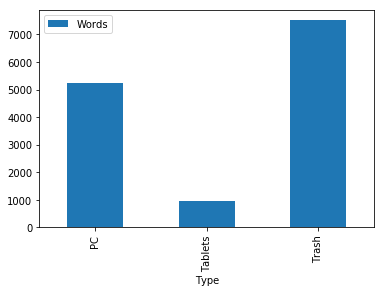

In [86]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df[['Words','Type']].groupby('Type').count().plot.bar(ylim=0)
plt.show()

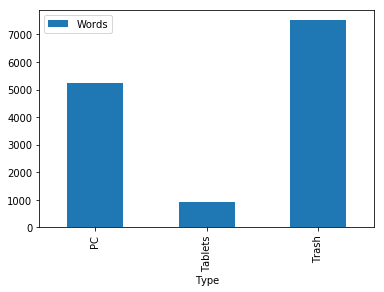

In [87]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df1[['Words','Type']].groupby('Type').count().plot.bar(ylim=0)
plt.show()

# Defining Model & Trash Words

In [88]:
#each line is a class
#mod = unique_db[unique_db['Encode']==1]['Words'].tolist()
#tr = unique_db[unique_db['Encode']==0]['Words'].tolist()
tablets = unique_db_org[unique_db_org['Encode']==1]['Words'].tolist()
#tablets = unique_db_org[unique_db_org['Encode']==1]['Words'].apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x)).tolist()
pcs = unique_db_org[unique_db_org['Encode']==2]['Words'].tolist()
#pcs = unique_db_org[unique_db_org['Encode']==2]['Words'].apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x)).tolist()
tr = unique_db_org[unique_db_org['Encode']==0]['Words'].tolist()
#tr = unique_db_org[unique_db_org['Encode']==0]['Words'].apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x)).tolist()
tab_str = " ".join(tablets)
pcs_str = " ".join(pcs)
tr_str = " ".join(tr)
tr_str
tab_str
pcs_str

'comput personal hp 12 8/256 eb820g4-nilfisk comput dell 12gb 1tb hdd dell-i5559-4013s comput personal hp 14 8/256 eb840-nilfisk notebook dell 15 3580 fygk4 comput personal hp 15 8/256 eb850-nilfisk comput portatil porsche design 13.3 qdah intel core i7-7500u 2.7ghz 16gb ram 512gb ss b072n1r4f7 notebook lenovo 16gb, 512mb,portatil 20jjs3n600 comput personal lenovo 16gb,ram 4,15.6 lenovo comput portatil hp 17.3 pulg. intel core i7-7500u 2.7ghz8gb ddr 1tb hd b06zzmbyj6 comput personal laptop microsoft surface pro 1796 1796 comput lenovo 18.5 in 17238bx notebook lenovo 1tb 20eqa11ucl notebook hp 200w p5q61aa comput laptop lenovo 20b6005jus, usado -codigo notebook lenovo 20jj notebook14 led intel core ynt017len01 comput samsung 21neo 21neo comput lenovo 4g 1tb 10kua01ucb notebook goettsch internationalinc 16gb - ram 1 5009145 notebook lenovo 16gb, 1tb, portatil 20hhs0hx00 notebook lenovo 16gb, 1tb,portatil 80vr001vcl notebook lenovo 16gb, 256mb, portatil 20hes5qp00 notebook lenovo 16gb, 51

In [89]:
documents = [tab_str]+[pcs_str]+[tr_str]
documents

['notebook microsoft surface pro 4 bundle mic-th2-00001 tablet levono tb3-850f za170071cl tablet lenovo tb3-850f za170078cl tablet amazon fire hd7 amz-b00ikpykwg notebook microsoft surface pro th4-00001 mic-th4-00001 orden tip tablet samsung galaxy fixmkt0023 orden tablet pc fujitsu portatil sitepro orden tablet pc acer portatiles nt.lcmal.001 orden tablets mlab m-712q m-712q orden tablets mlab 6522 6522 proces dat pvpower sro tablet -codigo comput personal tablet samsung sm-t560 sm-t560 comput personal tablet samsung sm-p350 sm-p350 comput personal tablet samsung sm-t1113 sm-t113nu comput personal tablet samsung sm-t116 sm-t116bu comput personal tablet samsung sm-t280 sm-t280 comput personal tablet samsung sm-p355m sm-p355mzaacho comput personal tablet samsung sm-p580 sm-p580nzkacho comput portatil tablet samsung sm-t113nu, blanco crema sm-t113ndwucho comput portatil tablet samsung sm-t113nu, negro sm-t113nykucho comput portatil tablet samsung sm-w700 sm-w700nzwach0 comput portatil ta

# Scikit Learn Approach

In [30]:
db_test = loading_excel() #C:\Users\Gpardo\Desktop\Clasification\DB\Clean Q2.xlsx
db_test.head()

Please write your file location: C:\Users\Gpardo\Desktop\Clasification\DB\Clean Q2.xlsx
This file contains this tab names: [Final]
Choose your tab name? Final
Your choice is Final
This is correct? Please write 1 for yes or 2 for no 1
Processing Tab, please wait


,Descripcion,Marca,Modelo,Caracteristicas,Descripcion_Clean,Test Vendors,Modelo_1
0,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B
1,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B
2,NOTE-BOOKS- USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,APARATO DE PESO INF. A 2C KILOS PARA EL TRATAM...,NOTE BOOKS USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-
3,ORDENADORES (TABLETS),MLAB,"TIPO TABLETAS, 8GB",MAQUINAS AUTOMATICAS PARATRATAMIENTO O PROCESA...,ORDENADORES TABLETS,MLAB,"TIPO TABLETAS, 8GB"
4,ORDENADORES TABLETS,PGX,ZEHN,"PORTATILES, PARA PROCESAMIENTOS DE DATOS",ORDENADORES TABLETS,PGX,ZEHN


In [31]:
db_test['Index Field 1'] = mergefield(db_test," ") #4,5,6,3
db_test['Index Field 1'] = db_test['Index Field 1'].str.replace('|'.join(esp_list), "", case=False).str.replace('\s\s+', " ", case=False)
db_test['Index Field 1 Clean'] = db_test['Index Field 1'].str.replace(r"\W"," ",case=False)
db_test

This file contains this columns:
0. Descripcion
1. Marca
2. Modelo
3. Caracteristicas
4. Descripcion_Clean
5. Test Vendors
6. Modelo_1
Choose the columns you want to merge.
4,5,6,3
Your Choice is ['Descripcion_Clean', 'Test Vendors', 'Modelo_1', 'Caracteristicas']


,Descripcion,Marca,Modelo,Caracteristicas,Descripcion_Clean,Test Vendors,Modelo_1,Index Field 1,Index Field 1 Clean
0,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...
1,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...
2,NOTE-BOOKS- USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,APARATO DE PESO INF. A 2C KILOS PARA EL TRATAM...,NOTE BOOKS USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US/SE...,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US SE...
3,ORDENADORES (TABLETS),MLAB,"TIPO TABLETAS, 8GB",MAQUINAS AUTOMATICAS PARATRATAMIENTO O PROCESA...,ORDENADORES TABLETS,MLAB,"TIPO TABLETAS, 8GB","ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB MA...",ORDENADORES TABLETS MLAB TIPO TABLETAS 8GB MA...
4,ORDENADORES TABLETS,PGX,ZEHN,"PORTATILES, PARA PROCESAMIENTOS DE DATOS",ORDENADORES TABLETS,PGX,ZEHN,"ORDENADORES TABLETS PGX ZEHN PORTATILES, PROCE...",ORDENADORES TABLETS PGX ZEHN PORTATILES PROCE...
5,COMPUTADOR,DELL-F,T620,"PROCESADOR DE DATOS PARA USOEN BIOTECNOLOGIA, ...",COMPUTADOR,DELL-F,T620,COMPUTADOR DELL-F T620 PROCESADOR DATOS USOEN ...,COMPUTADOR DELL F T620 PROCESADOR DATOS USOEN ...
6,SERVIDOR MONITOREO AMBIENTAL,NETWORK TECHNOLOGIES-F,MODELO E-MICRO-TRHP,DE SISTEMA DE VIGILANCIA DE CONDICIONES AMBIEN...,SERVIDOR MONITOREO AMBIENTAL,NETWORK TECHNOLOGIES-F,MODELO E-MICRO-TRHP,SERVIDOR MONITOREO AMBIENTAL NETWORK TECHNOLOG...,SERVIDOR MONITOREO AMBIENTAL NETWORK TECHNOLOG...
7,LINE IN MONITOR,NETWORK TECHNOLOGIES-F,MODELO E-DCLM-6,PARTES Y ACCESORIOS DE MAQUINAS DELA PARTIDA 8...,LINE IN MONITOR,NETWORK TECHNOLOGIES-F,MODELO E-DCLM-6,LINE IN MONITOR NETWORK TECHNOLOGIES-F MODELO ...,LINE IN MONITOR NETWORK TECHNOLOGIES F MODELO ...
8,UNIDAD CENTRAL DE PROCESO,MOTION METRICS-F,MMI-1400,"ACE 2X RS232, CON SISTEMA OPERATIVO WINDOWS 10...",UNIDAD CENTRAL DE PROCESO,MOTION METRICS-F,MMI-1400,UNIDAD CENTRAL PROCESO MOTION METRICS-F MMI-14...,UNIDAD CENTRAL PROCESO MOTION METRICS F MMI 14...
9,UNIDAD CENTRAL DE PROCESO,MOTION METRICS-F,MMI-1400,"ACE 2X RS232, CON SISTEMA OPERATIVO WINDOWS 10...",UNIDAD CENTRAL DE PROCESO,MOTION METRICS-F,MMI-1400,UNIDAD CENTRAL PROCESO MOTION METRICS-F MMI-14...,UNIDAD CENTRAL PROCESO MOTION METRICS F MMI 14...


In [32]:
db_test['Index Field 1 Clean'] = db_test['Index Field 1'].str.replace(r"\W"," ",case=False)

In [90]:
X_test = db_test['Index Field 1']
X_test_clean = db_test['Index Field 1 Clean']

# Final Classifier

In [91]:
features_org = df1['Words'] #d1
features_org_clean = df1['Words'].str.replace(r"\W"," ",case=False) #d1
labels_org = df1['Encode']
features = df['Words'] 
features_clean = df['Words'].str.replace(r"\W"," ",case=False)
labels = df['Encode']
labels_dict = {1:"Tablets", 2:"PCS", 0:"Trash"}

In [92]:
X_train = features#_org
X_train_clean = features_clean#_org_clean
y_train = labels#_org

In [93]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

vect = TfidfVectorizer(min_df=3, ngram_range=(1, 2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)

vect_clean = TfidfVectorizer(min_df=3, ngram_range=(1, 2)).fit(X_train_clean)
X_train_vectorized_clean = vect.transform(X_train_clean)

model = SVC(C=1000, gamma=0.001,kernel='rbf')
model.fit(X_train_vectorized, y_train)
#model.fit(X_train_vectorized_clean, y_train)
predictions = model.predict(vect.transform(X_test))
#predictions = model.predict(vect.transform(X_test_clean))

#print('F1 Measure: %.3f' % f1_score(y_test.astype(int),predictions, average='micro'))
#print('Precision: %.3f' % precision_score(y_test.astype(int),predictions, average='micro'))
#print('F1 Measure: %.3f' % recall_score(y_test.astype(int),predictions, average='micro'))

In [94]:
result = db_test
finalSVC = result.join(pd.DataFrame(predictions, columns = (['Predictions SVC'])))
finalSVC['Label'] = finalSVC['Predictions SVC']
finalSVC.replace({"Label": labels_dict}, inplace=True)
finalSVC.head()

,Descripcion,Marca,Modelo,Caracteristicas,Descripcion_Clean,Test Vendors,Modelo_1,Index Field 1,Index Field 1 Clean,Predictions SVC,Label
0,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets
1,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets
2,NOTE-BOOKS- USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,APARATO DE PESO INF. A 2C KILOS PARA EL TRATAM...,NOTE BOOKS USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US/SE...,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US SE...,0,Trash
3,ORDENADORES (TABLETS),MLAB,"TIPO TABLETAS, 8GB",MAQUINAS AUTOMATICAS PARATRATAMIENTO O PROCESA...,ORDENADORES TABLETS,MLAB,"TIPO TABLETAS, 8GB","ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB MA...",ORDENADORES TABLETS MLAB TIPO TABLETAS 8GB MA...,1,Tablets
4,ORDENADORES TABLETS,PGX,ZEHN,"PORTATILES, PARA PROCESAMIENTOS DE DATOS",ORDENADORES TABLETS,PGX,ZEHN,"ORDENADORES TABLETS PGX ZEHN PORTATILES, PROCE...",ORDENADORES TABLETS PGX ZEHN PORTATILES PROCE...,1,Tablets


In [95]:
vect_clean = TfidfVectorizer(min_df=3, ngram_range=(1, 2)).fit(X_train_clean)
X_train_vectorized_clean = vect.transform(X_train_clean)

model = SVC(C=1000, gamma=0.001,kernel='rbf')
model.fit(X_train_vectorized_clean, y_train)
#model.fit(X_train_vectorized_clean, y_train)
predictions = model.predict(vect.transform(X_test_clean))
#predictions = model.predict(vect.transform(X_test_clean))

#print('F1 Measure: %.3f' % f1_score(y_test.astype(int),predictions, average='micro'))
#print('Precision: %.3f' % precision_score(y_test.astype(int),predictions, average='micro'))
#print('F1 Measure: %.3f' % recall_score(y_test.astype(int),predictions, average='micro'))

In [96]:
finalSVCnosymb = result.join(pd.DataFrame(predictions, columns = (['Predictions SVC'])))
finalSVCnosymb['Label'] = finalSVCnosymb['Predictions SVC']
finalSVCnosymb.replace({"Label": labels_dict}, inplace=True)
finalSVCnosymb.head()

,Descripcion,Marca,Modelo,Caracteristicas,Descripcion_Clean,Test Vendors,Modelo_1,Index Field 1,Index Field 1 Clean,Predictions SVC,Label
0,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets
1,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets
2,NOTE-BOOKS- USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,APARATO DE PESO INF. A 2C KILOS PARA EL TRATAM...,NOTE BOOKS USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US/SE...,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US SE...,0,Trash
3,ORDENADORES (TABLETS),MLAB,"TIPO TABLETAS, 8GB",MAQUINAS AUTOMATICAS PARATRATAMIENTO O PROCESA...,ORDENADORES TABLETS,MLAB,"TIPO TABLETAS, 8GB","ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB MA...",ORDENADORES TABLETS MLAB TIPO TABLETAS 8GB MA...,1,Tablets
4,ORDENADORES TABLETS,PGX,ZEHN,"PORTATILES, PARA PROCESAMIENTOS DE DATOS",ORDENADORES TABLETS,PGX,ZEHN,"ORDENADORES TABLETS PGX ZEHN PORTATILES, PROCE...",ORDENADORES TABLETS PGX ZEHN PORTATILES PROCE...,1,Tablets


In [103]:
X_train_clean = features_org_clean
y_train = labels_org

In [104]:
vect_clean = TfidfVectorizer(min_df=3, ngram_range=(1, 2)).fit(X_train_clean)
X_train_vectorized_clean = vect.transform(X_train_clean)

model = SVC(C=1000, gamma=0.001,kernel='rbf')
model.fit(X_train_vectorized_clean, y_train)
#model.fit(X_train_vectorized_clean, y_train)
predictions = model.predict(vect.transform(X_test_clean))

predictions


array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [99]:
finalSVCnosymb_org = result.join(pd.DataFrame(predictions, columns = (['Predictions SVC'])))
finalSVCnosymb_org['Label'] = finalSVCnosymb_org['Predictions SVC']
finalSVCnosymb_org.replace({"Label": labels_dict}, inplace=True)
finalSVCnosymb_org.head()

,Descripcion,Marca,Modelo,Caracteristicas,Descripcion_Clean,Test Vendors,Modelo_1,Index Field 1,Index Field 1 Clean,Predictions SVC,Label
0,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets
1,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets
2,NOTE-BOOKS- USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,APARATO DE PESO INF. A 2C KILOS PARA EL TRATAM...,NOTE BOOKS USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US/SE...,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US SE...,0,Trash
3,ORDENADORES (TABLETS),MLAB,"TIPO TABLETAS, 8GB",MAQUINAS AUTOMATICAS PARATRATAMIENTO O PROCESA...,ORDENADORES TABLETS,MLAB,"TIPO TABLETAS, 8GB","ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB MA...",ORDENADORES TABLETS MLAB TIPO TABLETAS 8GB MA...,1,Tablets
4,ORDENADORES TABLETS,PGX,ZEHN,"PORTATILES, PARA PROCESAMIENTOS DE DATOS",ORDENADORES TABLETS,PGX,ZEHN,"ORDENADORES TABLETS PGX ZEHN PORTATILES, PROCE...",ORDENADORES TABLETS PGX ZEHN PORTATILES PROCE...,1,Tablets


In [43]:
db_test_1 = loading_excel() #C:\Users\Gpardo\Desktop\Clasification\DB\Clean Q2.xlsx
db_test_1.head()

Please write your file location: C:\Users\Gpardo\Desktop\Clasification\DB_Final.xlsx
This file contains this tab names: [SVC, SVC No Symb, SVC No Symb ORG, Trash Check, Tablet Check, PC Check, DB CHECK]
Choose your tab name? SVC No Symb ORG
Your choice is SVC No Symb ORG
This is correct? Please write 1 for yes or 2 for no 1
Processing Tab, please wait


,Descripcion,Marca,Modelo,Caracteristicas,Descripcion_Clean,Test Vendors,Modelo_1,Index Field 1,Index Field 1 Clean,Predictions SVC,Label,Final Label,Cantidad_Mercancias,Ano,Mes
0,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets,Tablets,4000.0,2018,5
1,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets,Tablets,200.0,2018,5
2,NOTE-BOOKS- USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,APARATO DE PESO INF. A 2C KILOS PARA EL TRATAM...,NOTE BOOKS USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US/SE...,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US SE...,2,PCS,PCS,1.0,2018,5
3,ORDENADORES (TABLETS),MLAB,"TIPO TABLETAS, 8GB",MAQUINAS AUTOMATICAS PARATRATAMIENTO O PROCESA...,ORDENADORES TABLETS,MLAB,"TIPO TABLETAS, 8GB","ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB MA...",ORDENADORES TABLETS MLAB TIPO TABLETAS 8GB MA...,1,Tablets,Tablets,20.0,2018,5
4,ORDENADORES TABLETS,PGX,ZEHN,"PORTATILES, PARA PROCESAMIENTOS DE DATOS",ORDENADORES TABLETS,PGX,ZEHN,"ORDENADORES TABLETS PGX ZEHN PORTATILES, PROCE...",ORDENADORES TABLETS PGX ZEHN PORTATILES PROCE...,1,Tablets,Tablets,700.0,2018,5


In [52]:
db_test_1.head()

,Descripcion,Marca,Modelo,Caracteristicas,Descripcion_Clean,Test Vendors,Modelo_1,Index Field 1,Index Field 1 Clean,Predictions SVC,Label,Final Label,Cantidad_Mercancias,Ano,Mes,Label New
0,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets,Tablets,4000.0,2018,5,1
1,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets,Tablets,200.0,2018,5,1
2,NOTE-BOOKS- USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,APARATO DE PESO INF. A 2C KILOS PARA EL TRATAM...,NOTE BOOKS USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US/SE...,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US SE...,2,PCS,PCS,1.0,2018,5,2
3,ORDENADORES (TABLETS),MLAB,"TIPO TABLETAS, 8GB",MAQUINAS AUTOMATICAS PARATRATAMIENTO O PROCESA...,ORDENADORES TABLETS,MLAB,"TIPO TABLETAS, 8GB","ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB MA...",ORDENADORES TABLETS MLAB TIPO TABLETAS 8GB MA...,1,Tablets,Tablets,20.0,2018,5,1
4,ORDENADORES TABLETS,PGX,ZEHN,"PORTATILES, PARA PROCESAMIENTOS DE DATOS",ORDENADORES TABLETS,PGX,ZEHN,"ORDENADORES TABLETS PGX ZEHN PORTATILES, PROCE...",ORDENADORES TABLETS PGX ZEHN PORTATILES PROCE...,1,Tablets,Tablets,700.0,2018,5,1


In [105]:
from sklearn import metrics
labels_dict = {"Tablets":1, "PCS":2, "Trash":0, "trash":0}
db_test_1['Label New'] = db_test_1['Final Label']
db_test_1.replace({'Label New': labels_dict}, inplace=True)
print(db_test_1['Label New'].unique())
y_test = db_test_1['Label New']
print(metrics.classification_report(y_test,predictions, target_names=db_test_1['Label'].unique()))

[1 2 0]
             precision    recall  f1-score   support

    Tablets       0.73      0.99      0.84      3203
        PCS       0.98      0.96      0.97       479
      Trash       0.99      0.52      0.68      2476

avg / total       0.85      0.80      0.79      6158



In [106]:
import datetime
trash_out = r'C:\Users\Gpardo\Desktop\Clasification\DB_Final_org' 
save = datetime.datetime.now().strftime("%y_%m_%d")
dir = trash_out +"_"+str(save)+".xlsx"
print(dir)

writer = pd.ExcelWriter(dir, engine='xlsxwriter')

#Convert the dataframe to an XlsxWriter Excel object.
finalSVC.to_excel(writer, sheet_name='SVC')
finalSVCnosymb.to_excel(writer, sheet_name='SVC No Symb')
finalSVCnosymb_org.to_excel(writer, sheet_name='SVC No Symb ORG')
# Close the Pandas Excel writer and output the Excel file.
writer.save()


C:\Users\Gpardo\Desktop\Clasification\DB_Final_org_a_18_07_12.xlsx
